Some of these things are out of pure curiosity 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [20]:
data = pd.read_csv('../data/processed/data.csv')

In [22]:
# Calculate the average Time by Grade
average_time_by_grade = data.groupby('Grade')['Time'].mean().reset_index()
average_time_by_grade.columns = ['Grade', 'Average Time']

# Convert time from seconds to MM:SS format
average_time_by_grade['Average Time'] = average_time_by_grade['Average Time'].apply(lambda x: f"{int(x // 60)}:{int(x % 60):02d}")

# Display the result
print(average_time_by_grade)

   Grade Average Time
0      7        18:46
1      8        19:18
2      9        19:51
3     10        19:13
4     11        18:39
5     12        18:26


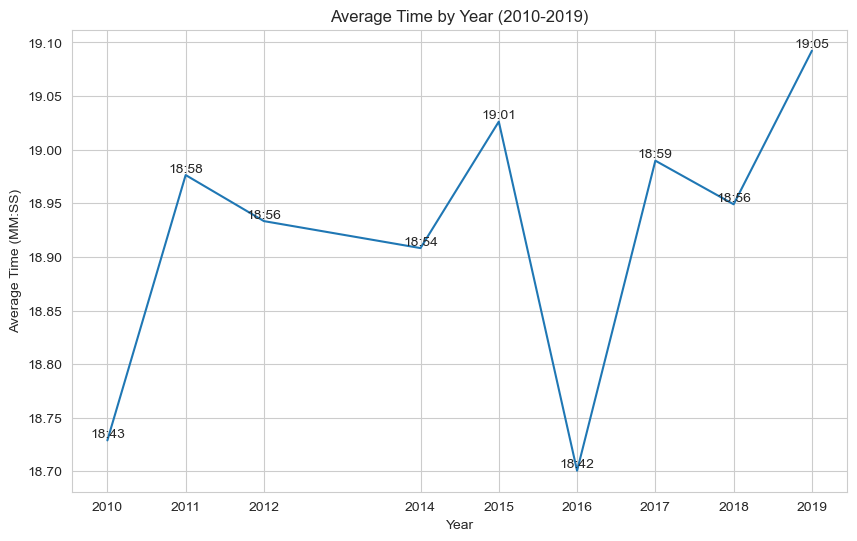

In [23]:
# Filter data for the years 2010 to 2019
filtered_data = data[(data['Year'] >= 2010) & (data['Year'] <= 2019)]

# Calculate the average Time by Year
average_time_by_year = filtered_data.groupby('Year')['Time'].mean().reset_index()
average_time_by_year.columns = ['Year', 'Average Time']

# Convert time from seconds to MM:SS format for plotting
average_time_by_year['Average Time MM:SS'] = average_time_by_year['Average Time'].apply(lambda x: f"{int(x // 60)}:{int(x % 60):02d}")

# Create a new column for plotting in minutes
average_time_by_year['Average Time (min)'] = average_time_by_year['Average Time'] / 60

# Plotting the average time by year in MM:SS format
plt.figure(figsize=(10, 6))
plt.plot(average_time_by_year['Year'], average_time_by_year['Average Time (min)'])
plt.xticks(average_time_by_year['Year'])
plt.xlabel('Year')
plt.ylabel('Average Time (MM:SS)')
plt.title('Average Time by Year (2010-2019)')
plt.grid(True)

# Adding labels to the plot with MM:SS format
for i, row in average_time_by_year.iterrows():
    plt.text(row['Year'], row['Average Time (min)'], row['Average Time MM:SS'], ha='center', va='bottom')

plt.show()


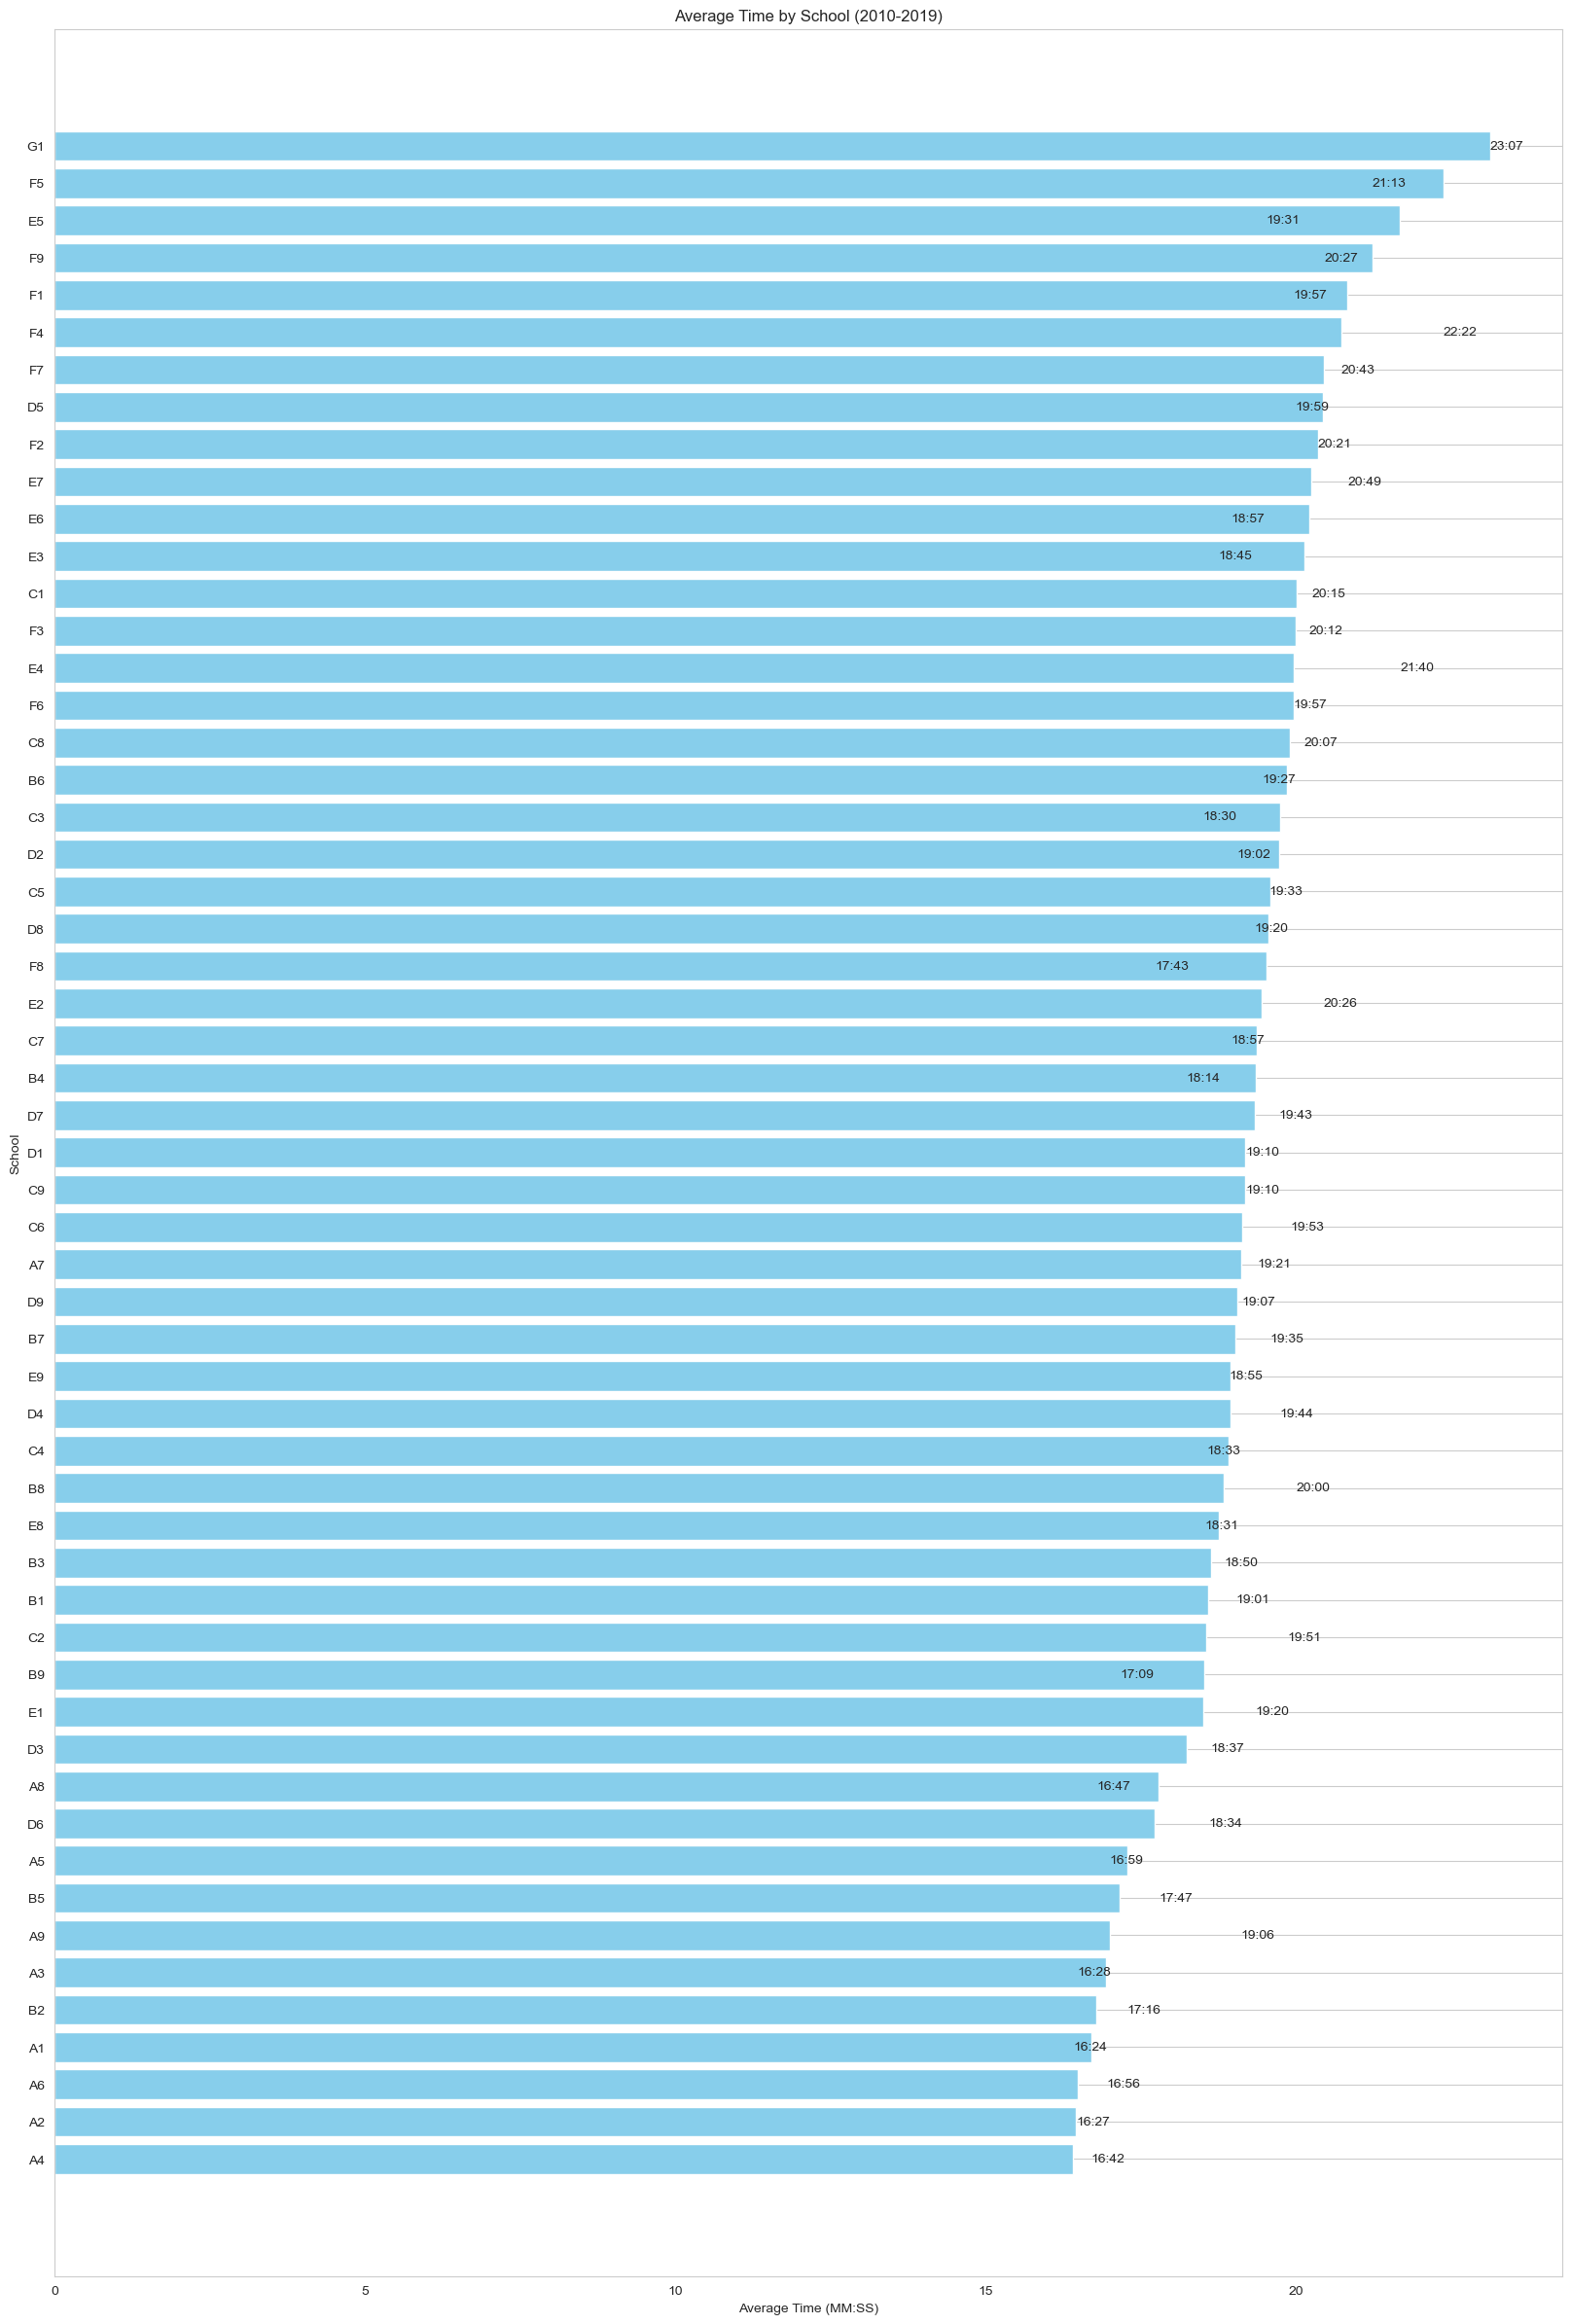

In [27]:
# Calculate the average Time by School for the years 2010 to 2019
average_time_by_school = filtered_data.groupby('School')['Time'].mean().reset_index()
average_time_by_school.columns = ['School', 'Average Time']

# Convert time from seconds to MM:SS format for plotting
average_time_by_school['Average Time MM:SS'] = average_time_by_school['Average Time'].apply(lambda x: f"{int(x // 60)}:{int(x % 60):02d}")

# Sort by average time for better visualization
average_time_by_school = average_time_by_school.sort_values(by='Average Time')

# Plotting the average time by school in MM:SS format
plt.figure(figsize=(20, 30))
plt.barh(average_time_by_school['School'], average_time_by_school['Average Time'] / 60, color='skyblue')
plt.xlabel('Average Time (MM:SS)')
plt.ylabel('School')
plt.title('Average Time by School (2010-2019)')
plt.grid(axis='x')

# Adding labels to the plot with MM:SS format
for index, row in average_time_by_school.iterrows():
    plt.text(row['Average Time'] / 60, index, row['Average Time MM:SS'], va='center')

plt.show()

In [30]:
# Filter data for the years 2010 to 2019
filtered_data = data[(data['Year'] >= 2010) & (data['Year'] <= 2019)]

# Calculate the overall average time by school to rank them
overall_average_time_by_school = filtered_data.groupby('School')['Time'].mean().reset_index()
overall_average_time_by_school.columns = ['School', 'Overall Average Time']
overall_average_time_by_school = overall_average_time_by_school.sort_values(by='Overall Average Time')

# Function to calculate the average yearly change for a given school
def calculate_average_yearly_change(school_data):
    name_groups = school_data.groupby('Name')
    yearly_changes = []
    
    for name, group in name_groups:
        if len(group) > 1:  # Only consider names that appear more than once
            sorted_group = group.sort_values(by='Year')
            yearly_change = sorted_group['Time'].diff().dropna()
            yearly_changes.extend(yearly_change)
    
    if yearly_changes:
        return sum(yearly_changes) / len(yearly_changes)
    else:
        return None

# Calculate the average yearly change for each school
average_yearly_changes = []
for school in overall_average_time_by_school['School']:
    school_data = filtered_data[filtered_data['School'] == school]
    avg_change = calculate_average_yearly_change(school_data)
    average_yearly_changes.append(avg_change)

overall_average_time_by_school['Average Yearly Change'] = average_yearly_changes

# Display the table
print(overall_average_time_by_school)


   School  Overall Average Time  Average Yearly Change
3      A4            984.473810             -20.901563
1      A2            987.457213             -19.122488
5      A6            988.916933             -18.730286
0      A1           1002.006951             -19.036286
10     B2           1007.367024             -22.306216
2      A3           1016.300119             -32.273784
8      A9           1019.962000             -27.013176
13     B5           1029.764578              -6.974000
4      A5           1036.789762             -17.728684
32     D6           1063.388727             -22.742098
7      A8           1067.022683             -35.673947
29     D3           1094.244162             -32.634595
36     E1           1110.084494             -40.716571
17     B9           1111.212603             -34.796000
19     C2           1113.167625              -7.828000
9      B1           1114.973836             -32.530370
11     B3           1117.446901             -35.659444
43     E8 